In [3]:
from sklearn.datasets import fetch_mldata

In [67]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt

In [395]:
#using kaggle suggestion
df_train = pd.read_csv('MNIST/dataset/train.csv')
df_test = pd.read_csv('MNIST/dataset/test.csv')
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 0:784]

print(X_test.shape)

(28000, 784)


In [402]:
df_features.shape

(42000, 784)

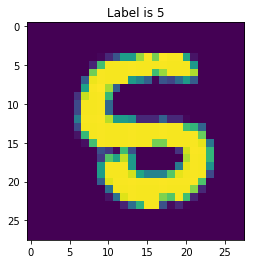

In [431]:
    label = df_label[19]
    
    df_features_copy = df_features.as_matrix().reshape(42000, 784)

    # The rest of columns are pixels
    pixels = df_features_copy[19]
    some_digits = pixels
    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels)
    plt.show()

In [449]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, 
                                                test_size = 0.2,
                                                random_state = 1212)

X_train = X_train.as_matrix().reshape(33600, 784) #(33600, 784)
X_cv = X_cv.as_matrix().reshape(8400, 784) #(8400, 784)

X_test = X_test.reshape(28000, 784)

In [419]:
#shufffle the training set so model can read the data randomly
shuffle_index = np.random.permutation(30000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

In [450]:
#lets identify only the number 5. This will be a binary classifier i.e either number will be 5 or not 5
y_train_5 = (y_train == 5)
y_test_5 = (y_cv == 5)

In [446]:
y_train_one = [5,8]

In [445]:
some_digit_test = [some_digit,df_features_copy[1834]]

In [453]:
y_train_5[y_train_5 == True]

35313    True
18245    True
8679     True
29149    True
13315    True
7777     True
38375    True
35282    True
30612    True
12174    True
33814    True
1213     True
20906    True
40048    True
8800     True
29171    True
37001    True
25584    True
39280    True
29073    True
7168     True
20876    True
15832    True
7770     True
13928    True
22135    True
34273    True
17860    True
33074    True
25628    True
         ... 
14745    True
17426    True
29413    True
18720    True
20377    True
30372    True
34638    True
38536    True
25752    True
14040    True
41688    True
13572    True
39583    True
15736    True
30703    True
35460    True
30597    True
15953    True
8317     True
1875     True
1605     True
20686    True
36304    True
10706    True
20829    True
31350    True
22988    True
18539    True
6590     True
19010    True
Name: label, Length: 3015, dtype: bool

In [451]:
#lets use the stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)
#sgd_clf.fit(some_digit_test,y_train_one)

C:\Users\sandeepkumar8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [455]:
#lets predict the label from trained model
#some_digit = X_train[16987]
sgd_clf.predict([X_train[1213]])

array([False])

In [274]:
train = pd.read_csv('MNIST/dataset/train.csv')
test = pd.read_csv('MNIST/dataset/test.csv')

In [275]:
train.shape

(42000, 785)

In [220]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [276]:
test.shape

(28000, 784)

In [277]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


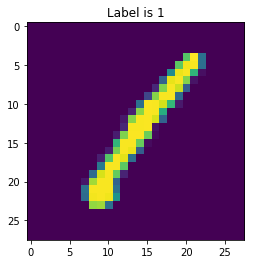

In [278]:
#lets see a sample data image    
    label = train['label'][0]

    # The rest of columns are pixels
    pixels = train.drop('label',axis =1)

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = np.array(pixels[:1], dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels)
    plt.show()

In [281]:
train_label = train['label']

In [285]:
train_label.shape

(42000,)

In [319]:
train.shape

(42000, 785)

In [359]:
train_label[10]

8

In [352]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train.iloc[:30000], train.iloc[30000:], train_label[:30000], train_label[30000:]

In [360]:
#shufffle the training set so model can read the data randomly
shuffle_index = np.random.permutation(30000)
X_train = X_train.iloc[shuffle_index]
y_train = y_train[shuffle_index]

In [362]:
#lets identify only the number 5. This will be a binary classifier i.e either number will be 5 or not 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [363]:
#lets use the stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\sandeepkumar8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [394]:
#lets predict the label from trained model
some_digit = X_train[16801]
some_digit = some_digit.drop('label',axis =1)
sgd_clf.predict([some_digit])

KeyError: 16801

In [390]:
some_digit

label       5
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 16801, Length: 785, dtype: int64

In [389]:
#lets see a sample data image    
    label = train['label'][some_digit]

    # The rest of columns are pixels
    pixels = train.drop('label',axis =1)

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    index_start = some_digit -1
    index_end = some_digit
    pixels = np.array(pixels[index_start: index_end], dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels)
    plt.show()

IndentationError: unexpected indent (<ipython-input-389-4c483505874c>, line 2)

In [189]:
y_test[6000]

array([9])

In [210]:
some_digit.shape

(1, 784)